<a href="https://colab.research.google.com/github/MuhammadtabishRao/machinerlearning/blob/main/ReutersData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [6]:
 train_labels[10]

3

In [15]:

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [21]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [23]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [24]:

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [25]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])


In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [27]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 15s 80ms/step - loss: 3.8186 - accuracy: 0.0367 - val_loss: 3.7980 - val_accuracy: 0.0440
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 3.7925 - accuracy: 0.0580 - val_loss: 3.7771 - val_accuracy: 0.3530
Epoch 3/20
16/16 [==============================] - 1s 45ms/step - loss: 3.7723 - accuracy: 0.3394 - val_loss: 3.7570 - val_accuracy: 0.3530
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 3.7517 - accuracy: 0.3577 - val_loss: 3.7373 - val_accuracy: 0.3530
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 3.7324 - accuracy: 0.3536 - val_loss: 3.7177 - val_accuracy: 0.3530
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 3.7117 - accuracy: 0.3503 - val_loss: 3.6984 - val_accuracy: 0.3530
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 3.6935 - accuracy: 0.3527 - val_loss: 3.6790 - val_accuracy: 0.3530
Epoch 8/20
1

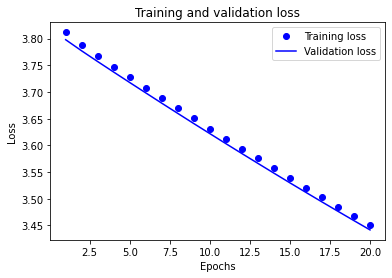

In [28]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

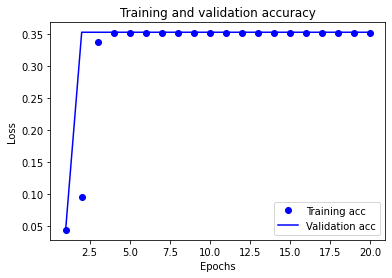

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 60ms/step - loss: 3.8185 - accuracy: 0.1369 - val_loss: 3.7979 - val_accuracy: 0.3530
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 3.7926 - accuracy: 0.3503 - val_loss: 3.7770 - val_accuracy: 0.3530
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 3.7716 - accuracy: 0.3536 - val_loss: 3.7570 - val_accuracy: 0.3530
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 3.7524 - accuracy: 0.3481 - val_loss: 3.7373 - val_accuracy: 0.3530
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 3.7318 - accuracy: 0.3464 - val_loss: 3.7177 - val_accuracy: 0.3530
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 3.7123 - accuracy: 0.3563 - val_loss: 3.6983 - val_accuracy: 0.3530
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 3.6920 - accuracy: 0.3504 - val_loss: 3.6790 - val_accuracy: 0.3530
Epoch 8/9
16/16 [===

In [31]:
results

[3.643038034439087, 0.3615316152572632]

In [32]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18521816562778273

In [34]:

predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [35]:
predictions


array([[0.0213358 , 0.02707909, 0.02082258, ..., 0.01924085, 0.02038153,
        0.01986727],
       [0.02063186, 0.02759864, 0.02072493, ..., 0.02060211, 0.02058989,
        0.02058933],
       [0.02063186, 0.02759864, 0.02072493, ..., 0.02060211, 0.02058989,
        0.02058933],
       ...,
       [0.02063186, 0.02759864, 0.02072493, ..., 0.02060211, 0.02058989,
        0.02058933],
       [0.02063186, 0.02759864, 0.02072493, ..., 0.02060211, 0.02058989,
        0.02058933],
       [0.02063186, 0.02759864, 0.02072493, ..., 0.02060211, 0.02058989,
        0.02058933]], dtype=float32)